# Project Title & Context

Project: Customer Churn Prediction & Retention Strategy

Industry: Telecommunications (Australia)

Tools: Python, Pandas, Scikit-learn, Matplotlib/Seaborn

Goal: Analyse churn drivers and build a predictive model to support targeted retention actions.

# Phase 1 — Load Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

file_path = "/content/drive/MyDrive/churn.csv"
df = pd.read_csv(file_path)

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Phase 2 — Initial Checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df[df['TotalCharges'] == ' ']


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


# Phase 3 — Data Cleaning
In this section, we:
- Fix incorrect data types  
- Handle missing values  
- Remove identifiers not useful for modelling  
- Prepare the dataset for EDA and modelling  


In [5]:
# Step 3.1 — Convert 'TotalCharges' to numeric
# The column contains blank strings (" "), so we convert it to numeric.
# Invalid values will become NaN.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [6]:
# Step 3.2 — Check for missing values
# After conversion, missing/invalid entries will appear as NaN.
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [7]:
# Step 3.3 — Remove rows with missing TotalCharges
# These customers usually have tenure = 0 (new customers), so we remove them.
df = df.dropna()
df.shape


(7032, 21)

In [8]:
# Step 3.4 — Remove 'customerID' column
# It is an identifier and not useful for modelling.
df = df.drop('customerID', axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

# Phase 4 — Exploratory Data Analysis (EDA)

In this section, we explore patterns related to customer churn:

- Overall churn rate
- How churn varies by tenure (loyalty)
- Pricing impact: MonthlyCharges & TotalCharges
- Contract types and churn behaviour
- Service-related factors such as TechSupport & OnlineSecurity

These insights help identify key drivers and support business recommendations.

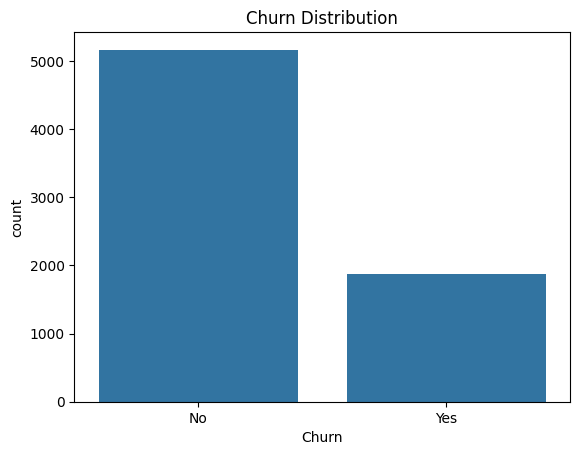

In [10]:
# Step 4.1 — Churn Distribution
# We start by checking how many customers churned vs stayed.
# This gives us a baseline understanding of the imbalance in the dataset.

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()


About 26–27% of customers in this dataset have churned.
This shows an imbalanced dataset, which is typical in telecom churn problems.
The company is losing roughly 1 in 4 customers, which is financially significant.


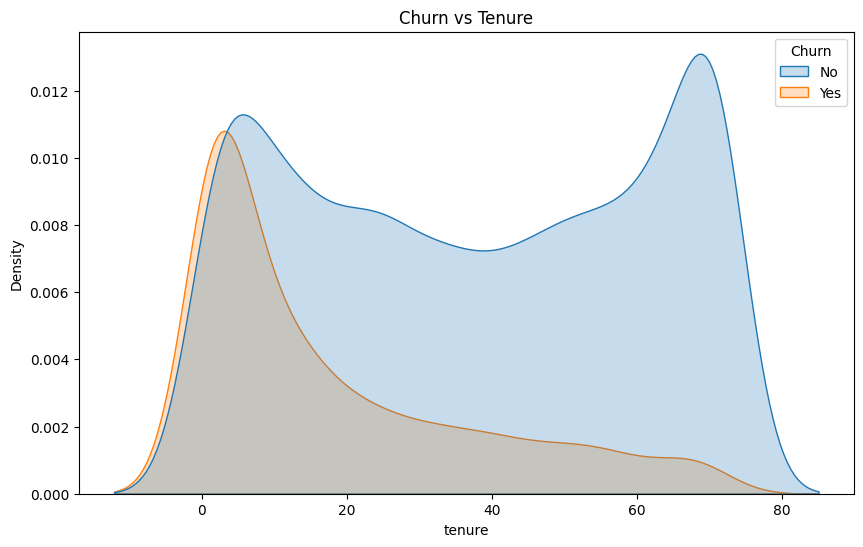

In [11]:
# Step 4.2 — Churn vs Tenure
# Tenure tells us how long the customer has been with the company.
# New customers typically churn more often because they haven't built loyalty.

plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='tenure', hue='Churn', fill=True)
plt.title("Churn vs Tenure")
plt.show()


Churn is highest among new customers (tenure 0–12 months).
The longer a customer stays, the less likely they are to churn.
This suggests a loyalty effect: customers who survive the first year tend to remain longer.


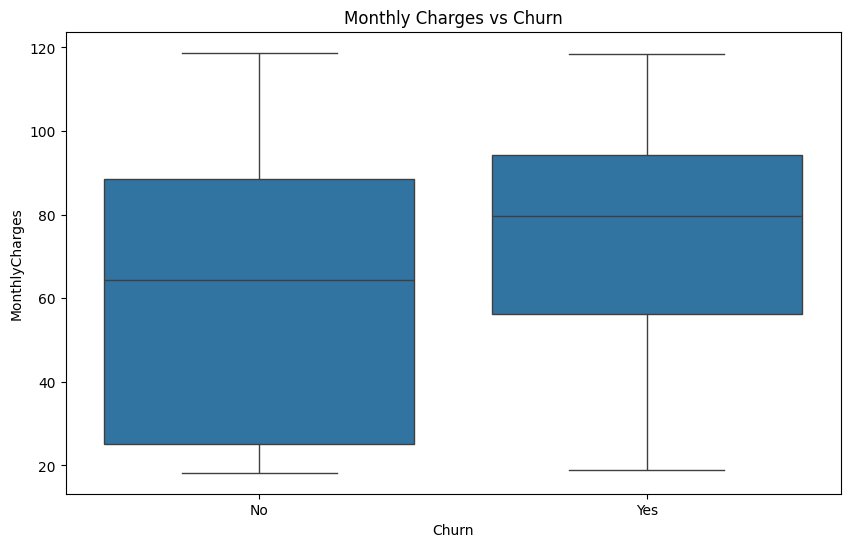

In [12]:
# Step 4.3 — Churn vs MonthlyCharges
# We analyse whether pricing affects customer churn.
# Higher monthly charges may lead customers to switch providers.
plt.figure(figsize=(10,6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


Customers who churn tend to have higher monthly charges.
This indicates price sensitivity—customers paying more are more likely to leave.


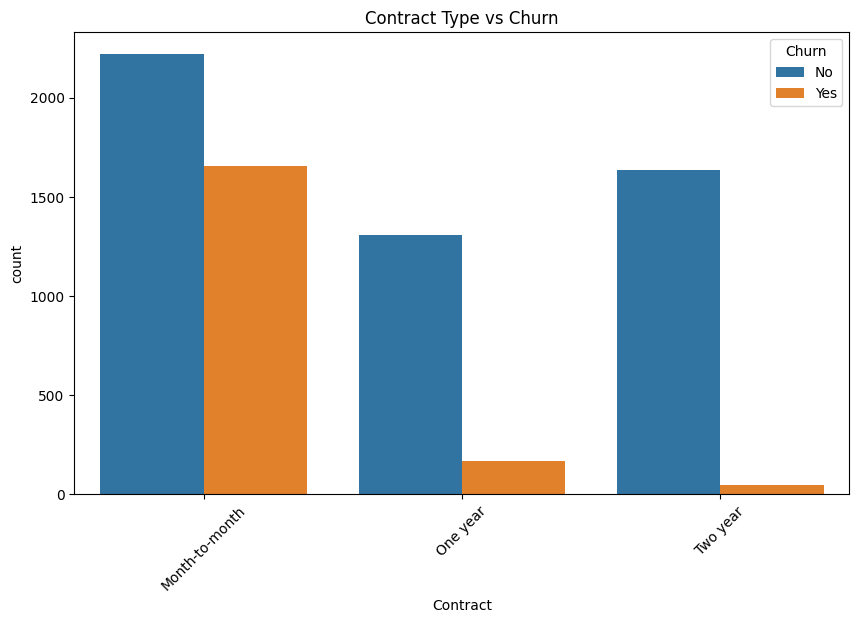

In [13]:
# Step 4.4 — Churn vs Contract Type
# Contract type is one of the strongest indicators of churn.
# Month-to-month contracts usually show the highest churn rates.

plt.figure(figsize=(10,6))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Contract Type vs Churn")
plt.xticks(rotation=45)
plt.show()


Month-to-month customers churn far more than one-year or two-year contract customers.
Lock-in contracts reduce churn significantly.
This is a key retention opportunity for the business.


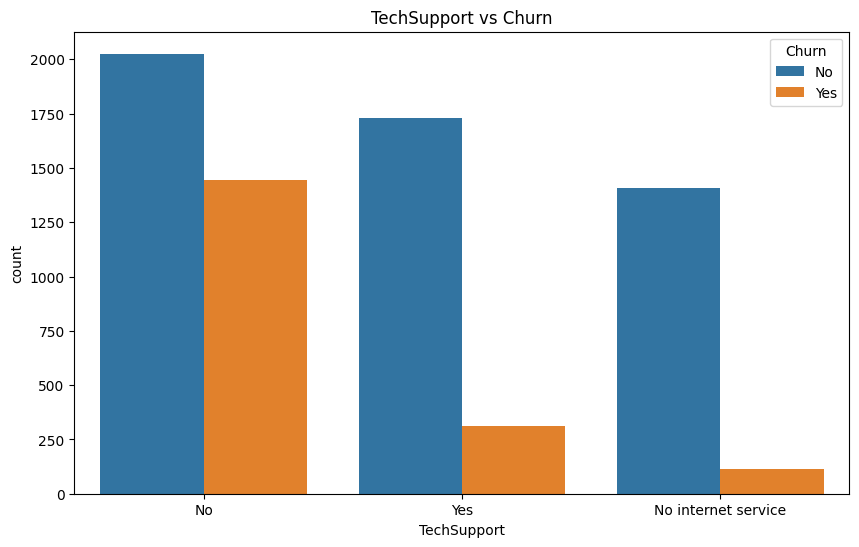

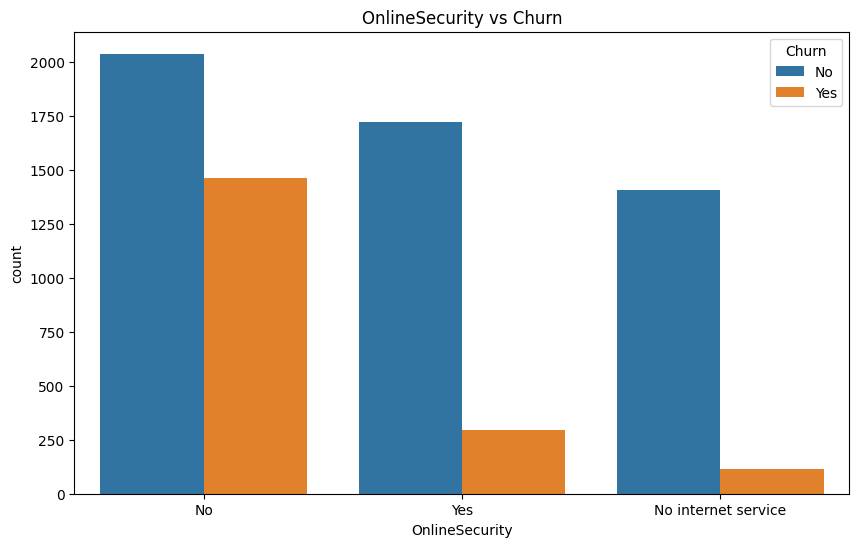

In [14]:
# Step 4.5 — Churn vs Service Add-ons (TechSupport, OnlineSecurity)
# Customers without support or security services may have poorer experiences and higher churn.
plt.figure(figsize=(10,6))
sns.countplot(x='TechSupport', hue='Churn', data=df)
plt.title("TechSupport vs Churn")
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(x='OnlineSecurity', hue='Churn', data=df)
plt.title("OnlineSecurity vs Churn")
plt.show()


Customers who do not have TechSupport or OnlineSecurity churn significantly more.
These services act as retention tools — they reduce frustration and improve customer experience.


# Phase 5 — Data Preparation for Modelling

Before building predictive models, we need to convert categorical variables into numerical form.
Most machine learning models cannot work with text labels such as:
- Yes / No
- DSL / Fiber Optic / No internet service
- Month-to-month / One year / Two year

We perform:
1. Encoding the target variable (Churn) into binary values  
2. One-Hot Encoding for all categorical features  
3. Train–test splitting  
4. Feature scaling for Logistic Regression


In [15]:
# Step 5.1 — Encode Churn Target Variable
# Churn is currently Yes/No. We convert it to binary:
# Yes = 1 (customer churned)
# No = 0 (customer stayed)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [16]:
# Step 5.2 — One-Hot Encode Categorical Variables
# We convert all object-type columns into numerical dummy variables using pandas.get_dummies.
# This ensures the model can interpret them.
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


drop_first=True prevents dummy variable trap.

In [17]:
# Step 5.3 — Train/Test Split (80/20)
# We split the dataset into:
# X (features)
# y (target)
# Training data: for model learning
# Testing data: for evaluating performance
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape


((5625, 30), (1407, 30))

In [18]:
# Step 5.4 — Feature Scaling
# Logistic Regression is distance-based and works best when features are scaled.
# Random Forest does not require scaling, but we scale anyway for completeness.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Phase 6 — Predictive Modelling

We build two predictive models commonly used in churn analytics:

1. Logistic Regression  
   - Simple, interpretable  
   - Baseline model  
   - Useful for understanding direction of influence  

2. Random Forest  
   - More powerful, handles complex interactions  
   - Provides feature importance  
   - Performs better on mixed categorical data  

We evaluate models using:
- Accuracy  
- Precision/Recall  
- Confusion Matrix  
- ROC Curve  
- Feature Importance  

This helps the business identify high-risk customers and understand the strongest churn drivers.

In [19]:
# Step 6.1 — Logistic Regression Model
# This is our baseline model.
# We use the scaled features for Logistic Regression.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)


In [20]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.8038379530916845
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



In [21]:
# Step 6.2 — Random Forest Model
# Random Forest handles categorical interactions very well and often outperforms logistic regression in churn prediction.
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=300, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)


In [22]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7889125799573561
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



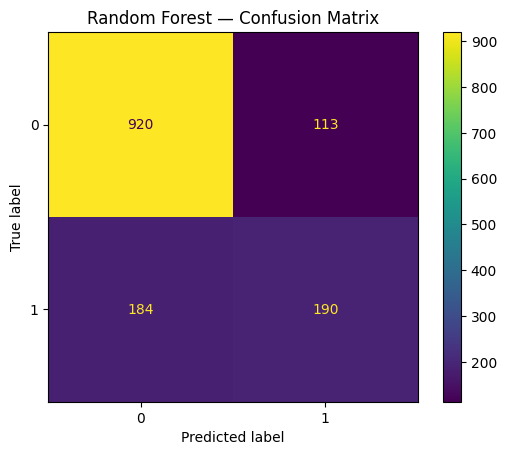

In [23]:
# Step 6.3 — Confusion Matrix
# This helps understand: - How many churners we predicted correctly And
# - How many false positives/false negatives
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
plt.title("Random Forest — Confusion Matrix")
plt.show()


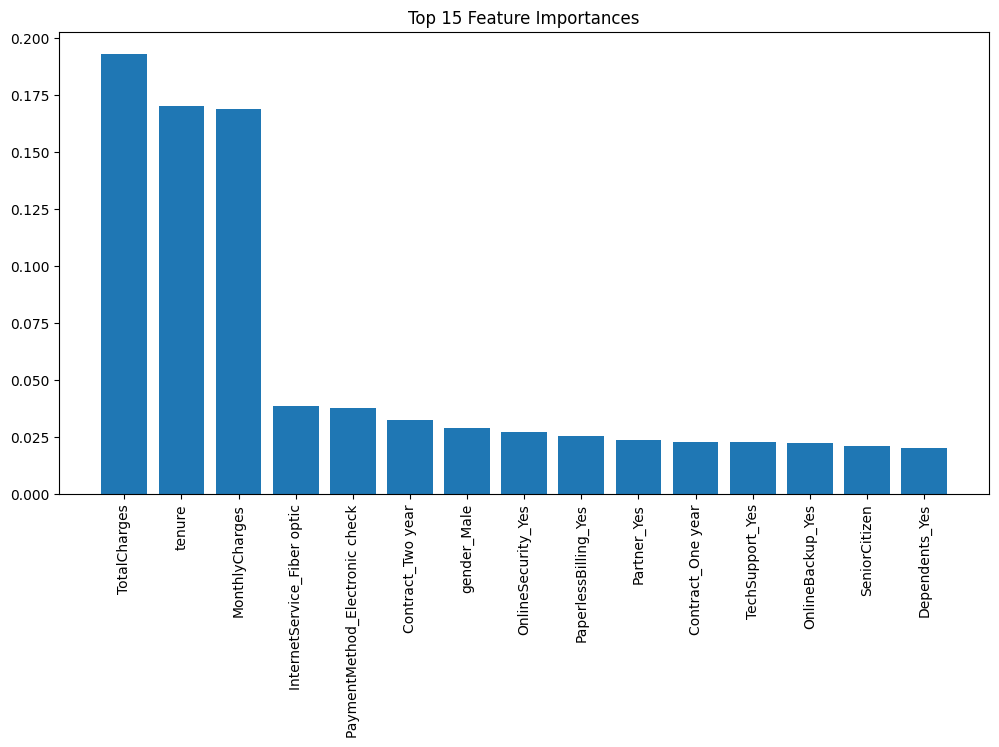

In [24]:
# Step 6.4 — Feature Importance
# We identify which features are the strongest predictors of churn and these insights directly support business recommendations.
import numpy as np

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title("Top 15 Feature Importances")
plt.bar(range(15), importances[indices][:15])
plt.xticks(range(15), X.columns[indices][:15], rotation=90)
plt.show()
